import dependencies

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
%matplotlib inline

load student data

In [4]:
student_data = pd.read_csv("../model experimentation and evaluation/student_data.csv")


build corr plot

<AxesSubplot:>

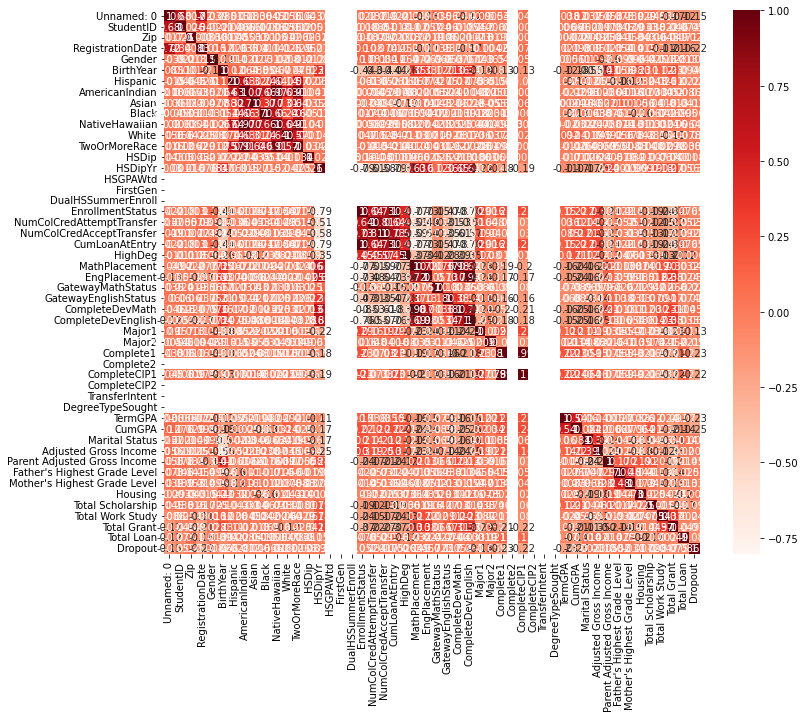

In [5]:
plt.figure(figsize=(12,10))
cor = student_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

get relevant features

In [21]:
#Correlation with output variable
cor_target = abs(cor["Dropout"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Unnamed: 0                      0.148498
StudentID                       0.051702
RegistrationDate                0.215852
BirthYear                       0.065546
EnrollmentStatus                0.052238
CumLoanAtEntry                  0.052238
EngPlacement                    0.056721
CompleteDevMath                 0.054075
CompleteDevEnglish              0.060667
Major1                          0.126497
Major2                          0.059226
Complete1                       0.226916
CompleteCIP1                    0.223377
TermGPA                         0.234345
CumGPA                          0.251399
Parent Adjusted Gross Income    0.054565
Total Scholarship               0.097843
Total Grant                     0.074879
Total Loan                      0.085906
Dropout                         1.000000
Name: Dropout, dtype: float64

select relevant feautures from dataset

In [28]:
student_data_relevant=  student_data[["RegistrationDate", "BirthYear", "EnrollmentStatus", "CumLoanAtEntry", "EngPlacement", "CompleteDevMath", "CompleteDevEnglish" , "Major1", "Major2", "Complete1", "CompleteCIP1", "TermGPA", "CumGPA", "Parent Adjusted Gross Income", "Total Scholarship", "Total Grant", "Total Loan" , "Dropout"]]

In [29]:
student_data_relevant

,RegistrationDate,BirthYear,EnrollmentStatus,CumLoanAtEntry,EngPlacement,CompleteDevMath,CompleteDevEnglish,Major1,Major2,Complete1,CompleteCIP1,TermGPA,CumGPA,Parent Adjusted Gross Income,Total Scholarship,Total Grant,Total Loan,Dropout
0,20140507,1980,2,-1,0,-2.0,-2.0,23.0101,-1.0000,7.0,23.01010,4.000000,3.820,0.0,0.00,7148.0,25500.0,0
1,20140113,1981,2,-1,0,-2.0,-2.0,51.3801,-1.0000,4.0,24.69005,3.850000,3.575,0.0,0.00,0.0,0.0,0
2,20120731,1977,2,-1,0,0.0,-2.0,0.0000,-1.0000,0.0,-2.00000,2.650000,2.020,0.0,0.00,18025.0,34000.0,1
3,20130618,1984,1,-2,0,0.0,-2.0,52.0801,-1.0000,0.0,-2.00000,3.833333,3.470,0.0,0.00,7601.0,0.0,0
4,20120426,1978,2,-1,1,0.0,0.0,52.0801,-1.0000,0.0,-2.00000,2.000000,3.000,0.0,0.00,7138.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,20160823,1984,2,-1,0,-2.0,-2.0,43.0199,-1.0000,0.0,-2.00000,2.700000,3.050,0.0,0.00,0.0,0.0,0
2330,20160908,1990,2,-1,0,-2.0,-2.0,43.0199,-1.0000,8.0,43.01990,3.150000,2.690,0.0,0.00,11573.0,12500.0,0
2331,20160823,1991,2,-1,0,-2.0,-2.0,52.0301,-1.0000,0.0,-2.00000,2.650000,3.530,0.0,3000.00,4465.0,0.0,0
2332,20160901,1968,2,-1,0,-2.0,-2.0,43.0399,-1.0000,0.0,-2.00000,4.000000,3.910,0.0,7740.10,3765.0,0.0,0


In [31]:
student_data_relevant["CompleteDevEnglish"].value_counts()

-2.0    1911
 0.0     413
-1.0       7
 0.5       2
 1.0       1
Name: CompleteDevEnglish, dtype: int64

create csv file

In [32]:
student_data_relevant.to_csv("feature analysis.csv")